# Dataset Preparation


### Setup

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import arff
warnings.filterwarnings('ignore')

seed = 1855
dataset_path = './classification-problems/credit-g/dataset/dataset_31_credit-g.arff'


## Data Collection


In [21]:
# load into a dataframe the arff file in dataset_path

df = pd.DataFrame(arff.loadarff(dataset_path)[0])


df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


## Handling missing values and cleaning the data


In [22]:
# converting bytes to string
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

df.head()

# check for missing values

df.isnull().sum() 

# no missing values

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

## Encoding categorical features with One-Hot Encoding


In [23]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

categorical_features.remove('class')

df = pd.get_dummies(df, columns=categorical_features)


df.head()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_0<=X<200,checking_status_<0,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,good,False,True,...,True,False,False,True,False,False,False,True,False,True
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,bad,True,False,...,True,False,False,True,False,False,True,False,False,True
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,good,False,False,...,True,False,False,False,False,True,True,False,False,True
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,good,False,True,...,False,False,False,True,False,False,True,False,False,True
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,bad,False,True,...,False,False,False,True,False,False,True,False,False,True


## Encoding binary class label


In [25]:
# Encoding binary columns as -1 and 1 instead of True and False

binary_columns = df.nunique()[df.nunique() == 2].index.tolist()

for col in binary_columns:
    df[col] = df[col].map({df[col].unique()[0]: -1, df[col].unique()[1]: 1})
    
df.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_0<=X<200,checking_status_<0,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,48.0,5951.0,2.0,2.0,22.0,1.0,-1,1,1,1,...,-1,-1,-1,-1,-1,-1,1,1,-1,-1
2,12.0,2096.0,2.0,3.0,49.0,1.0,1,-1,-1,1,...,-1,-1,-1,1,-1,1,1,1,-1,-1
3,42.0,7882.0,2.0,4.0,45.0,1.0,1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,1,1,-1,-1
4,24.0,4870.0,3.0,4.0,53.0,2.0,1,1,-1,-1,...,1,-1,-1,-1,-1,-1,1,1,-1,-1


# Model Building


In [67]:
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.neighbors import *
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.naive_bayes import *

ModuleNotFoundError: No module named 'sklearn.xgboost'

## Splitting the dataset into training and testing sets


In [27]:
x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

## Evaluation function


In [56]:
def evaluate(expected, predicted):
  scores =  {
    'accuracy': accuracy_score(expected, predicted),
    'precision': precision_score(expected, predicted),
    'recall': recall_score(expected, predicted),
    'f1': f1_score(expected, predicted),
    'roc_auc': roc_auc_score(expected, predicted)
  }
  
  for score, value in scores.items():
    name = score.replace('_', ' ').capitalize()
    print(f'{name}: {value}')
    
    
def confusion_matrix_heatmap(expected, predicted):
  # display also true positive, true negative, false positive and false negative
  cm = confusion_matrix(expected, predicted)
  ax = plt.subplot()
  # instead of displaying 0 and 1, display 'negative' and 'positive'
  sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  
  

## Model Building


In [38]:
model = LogisticRegression()

## Model Evaluation


### Cross Validation

In [43]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=10)

for score, values in scores.items():
  if score != 'fit_time' and score != 'score_time':
    name = score.replace('_', ' ').replace('test ', '').capitalize()
    print(f'{name}: {values.mean():.3f} +- {values.std():.3f}')
  

Accuracy: 0.747 +- 0.050
Precision: 0.613 +- 0.106
Recall: 0.486 +- 0.108
F1: 0.536 +- 0.095
Roc auc: 0.795 +- 0.045


### Cross Validation with KFold

In [45]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
k_fold = KFold(n_splits=10, random_state=seed, shuffle=True)

scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=k_fold)

for score, values in scores.items():
  if score != 'fit_time' and score != 'score_time':
    name = score.replace('_', ' ').replace('test ', '').capitalize()
    print(f'{name}: {values.mean():.3f} +- {values.std():.3f}')
  

Accuracy: 0.753 +- 0.051
Precision: 0.621 +- 0.089
Recall: 0.508 +- 0.059
F1: 0.556 +- 0.060
Roc auc: 0.795 +- 0.055


### Cross Validation with StratifiedKFold

In [46]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
k_fold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=k_fold)

for score, values in scores.items():
  if score != 'fit_time' and score != 'score_time':
    name = score.replace('_', ' ').replace('test ', '').capitalize()
    print(f'{name}: {values.mean():.3f} +- {values.std():.3f}')
  

Accuracy: 0.744 +- 0.046
Precision: 0.585 +- 0.088
Recall: 0.498 +- 0.134
F1: 0.534 +- 0.112
Roc auc: 0.795 +- 0.036


## Model Building with Hyperparameter Tuning


In [48]:
model = LogisticRegression()
params = {
  'C': [0.1, 1, 10, 100],
  'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(model, params, scoring='accuracy', cv=k_fold)

grid_search.fit(x_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'C': 0.1, 'penalty': 'l2'}



## Model Evaluation


Accuracy: 0.745
Precision: 0.5576923076923077
Recall: 0.5087719298245614
F1: 0.5321100917431193
Roc auc: 0.6739663844927003


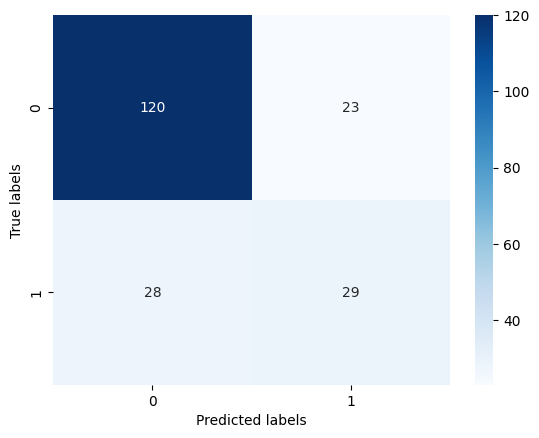

In [57]:
best_model = grid_search.best_estimator_

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

evaluate(y_test, y_pred)

confusion_matrix_heatmap(y_test, y_pred)

# Comparing Different Models Performance

## Model Building

In [68]:
models = {
  'Logistic Regression': LogisticRegression(),
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'KNN': KNeighborsClassifier(),
  'SVM': SVC(),
  'Naive Bayes': GaussianNB(),
  'AdaBoost': AdaBoostClassifier(),
  'Gradient Boosting': GradientBoostingClassifier(),
}

## Model Comparison

In [69]:

results = {}

for name, model in models.items():
    results[name] = cross_val_score(model, x_train, y_train, cv=k_fold, scoring='accuracy')


result_df = pd.DataFrame(results).transpose()

result_df['mean'] = result_df.mean(axis=1)
result_df['std'] = result_df.std(axis=1)
result_df = result_df.sort_values(by=['mean', 'std'], ascending=False)
result_df

,0,1,2,3,4,5,6,7,8,9,mean,std
Random Forest,0.7375,0.8375,0.7000,0.7875,0.7750,0.7500,0.7250,0.7750,0.8125,0.7000,0.76000,0.043589
AdaBoost,0.7375,0.8125,0.7250,0.7750,0.7500,0.7375,0.8000,0.7750,0.7000,0.7125,0.75250,0.035267
Gradient Boosting,0.7250,0.8250,0.7375,0.7125,0.7375,0.7500,0.7625,0.7500,0.7625,0.7250,0.74875,0.029817
Logistic Regression,0.6875,0.7875,0.6625,0.7375,0.8125,0.7875,0.7625,0.7375,0.7625,0.7000,0.74375,0.045843
SVM,0.7000,0.7000,0.7125,0.7250,0.7375,0.7125,0.6875,0.7125,0.6875,0.7000,0.70750,0.015000
Naive Bayes,0.6750,0.7625,0.6875,0.7125,0.7500,0.6750,0.6750,0.7375,0.6750,0.6500,0.70000,0.036228
KNN,0.7125,0.6625,0.6625,0.6625,0.6625,0.7125,0.6500,0.7000,0.6500,0.7125,0.67875,0.025648
Decision Tree,0.6500,0.7625,0.6625,0.6750,0.6000,0.6375,0.6625,0.7000,0.6625,0.6375,0.66500,0.041003
